In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv("../data/HR_comma_sep.csv") 

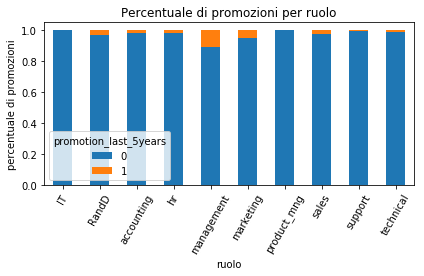

In [16]:
# Per ogni ruolo, conta la percentuale di promossi e non promossi
prom_by_role = pd.crosstab(df['sales'], df['promotion_last_5years'])

# Normalizza nell'intervallo [0,1] il numero di promossi / non promossi
prom_by_role_pct = \
    prom_by_role.div(prom_by_role.sum(1).astype(float), axis=0)
    
prom_by_role_pct.plot(kind='bar', stacked=True)
plt.title('Percentuale di promozioni per ruolo')
plt.xlabel('ruolo')
plt.ylabel('percentuale di promozioni')
plt.tight_layout()
plt.xticks(rotation=60)
plt.savefig('images/promotion_by_role')

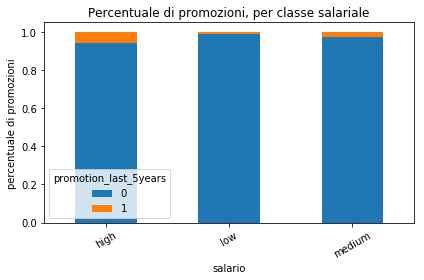

In [14]:
# Per ogni salario, conta la percentuale di promossi e non promossi
prom_by_sales = pd.crosstab(df['salary'], df['promotion_last_5years'])

# Normalizza nell'intervallo [0,1] il numero di promossi / non promossi
prom_by_sales_pct = \
    prom_by_sales.div(prom_by_sales.sum(1).astype(float), axis=0)
    
prom_by_sales_pct.plot(kind='bar', stacked=True)
plt.title('Percentuale di promozioni, per classe salariale')
plt.xlabel('salario')
plt.ylabel('percentuale di promozioni')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('images/promotion_by_salary')

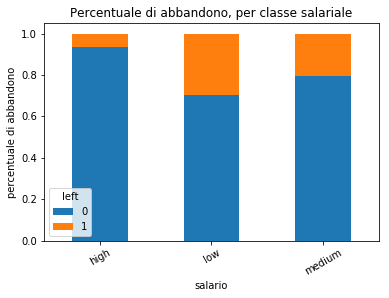

In [17]:
# Per ogni salario, conta la percentuale di abbandono
left_by_salary = pd.crosstab(df['salary'], df['left'])

# Normalizza nell'intervallo [0,1] il numero di abbandoni
left_by_salary_pct = \
    left_by_salary.div(left_by_salary.sum(1).astype(float), axis=0)
    
left_by_salary_pct.plot(kind='bar', stacked=True)
plt.title('Percentuale di abbandono, per classe salariale')
plt.xlabel('salario')
plt.ylabel('percentuale di abbandono')
plt.xticks(rotation=30)
plt.savefig('images/left_by_salary')

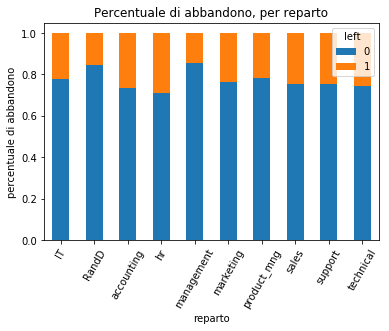

In [5]:
# Per ogni reparto, conta la percentuale di abbandono
left_by_sales = pd.crosstab(df['sales'], df['left'])

# Normalizza nell'intervallo [0,1] il numero di abbandoni
left_by_sales = \
    left_by_sales.div(left_by_sales.sum(1).astype(float), axis=0)
    
left_by_sales.plot(kind='bar', stacked=True)
plt.title('Percentuale di abbandono, per reparto')
plt.xlabel('reparto')
plt.ylabel('percentuale di abbandono')
plt.xticks(rotation=60)
plt.savefig('images/left_by_sales')

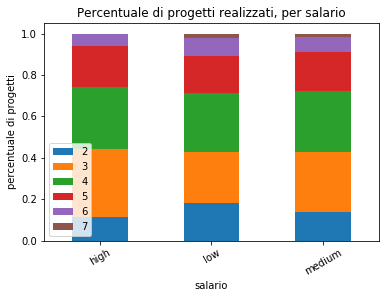

In [6]:
# Per ogni salario e per ogni numero di progetti, conta la percentuale
number_project_by_salary = pd.crosstab(df['salary'], df['number_project'])

number_project_by_salary_pct = \
    number_project_by_salary.div(number_project_by_salary.sum(1).astype(float), axis=0)
    
number_project_by_salary_pct.plot(kind='bar', stacked=True)
plt.title('Percentuale di progetti realizzati, per salario')
plt.xlabel('salario')
plt.legend(loc='best')
plt.ylabel('percentuale di progetti')
plt.xticks(rotation=30)
plt.savefig('images/number_project_by_salary')

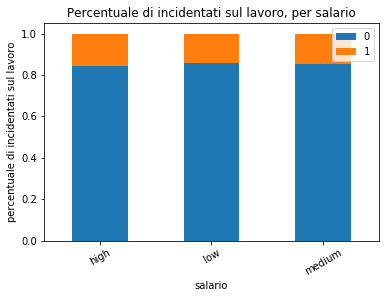

In [7]:
# Per ogni salario, conta la percentuale di incidentati
accident_by_salary = pd.crosstab(df['salary'], df['Work_accident'])

accident_by_salary = \
    accident_by_salary.div(accident_by_salary.sum(1).astype(float), axis=0)
    
accident_by_salary.plot(kind='bar', stacked=True)
plt.title('Percentuale di incidentati sul lavoro, per salario')
plt.xlabel('salario')
plt.ylabel('percentuale di incidentati sul lavoro')
plt.legend(loc='best')
plt.xticks(rotation=30)
plt.savefig('images/accident_by_salary')

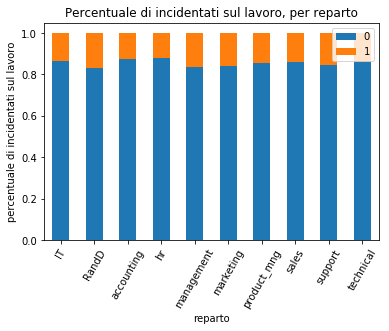

In [18]:
# Per ogni reparto, conta la percentuale di incidentati
accident_by_dept = pd.crosstab(df['sales'], df['Work_accident'])

accident_by_dept = \
    accident_by_dept.div(accident_by_dept.sum(1).astype(float), axis=0)
    
accident_by_dept.plot(kind='bar', stacked=True)
plt.title('Percentuale di incidentati sul lavoro, per reparto')
plt.xlabel('reparto')
plt.ylabel('percentuale di incidentati sul lavoro')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.savefig('images/accident_by_department')

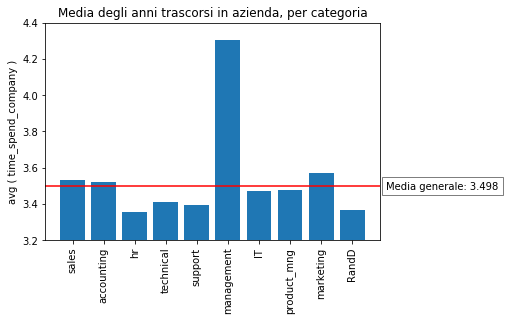

In [7]:
total_mean = df['time_spend_company'].mean()

# df[['last_evaluation', 'sales']].groupby('sales').mean()

xlabel = df['sales'].unique()
ylabel = []

for i in df['sales'].unique():
    tmp = df[df['sales'] == i].time_spend_company.mean()
    ylabel.append(tmp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
x = xlabel
y = ylabel
ax.bar(np.arange(len(xlabel)), y)
ax.axhline(total_mean, color="red")
ax.text(1.02, total_mean, "Media generale: %.3f" % total_mean, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())
plt.xticks(np.arange(len(xlabel)), xlabel, rotation=90)
plt.title("Media degli anni trascorsi in azienda, per categoria")
plt.ylim((3.2,4.4))
plt.ylabel("avg ( time_spend_company )")
plt.show()
############################################################################################
# Questo è un esempio di grafico che rivela una caratteristica interessante dei "management"
############################################################################################

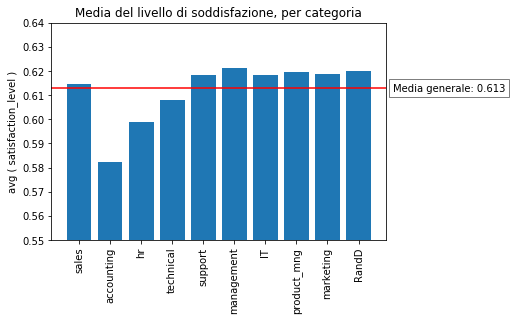

In [8]:
total_mean = df['satisfaction_level'].mean()

xlabel = df['sales'].unique()
ylabel = []

for i in df['sales'].unique():
    tmp = df[df['sales'] == i].satisfaction_level.mean()
    ylabel.append(tmp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
x = xlabel
y = ylabel
ax.bar(np.arange(len(xlabel)), y)
ax.axhline(total_mean, color="red")
ax.text(1.02, total_mean, "Media generale: %.3f" % total_mean, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())
plt.xticks(np.arange(len(xlabel)), xlabel, rotation=90)
plt.title("Media del livello di soddisfazione, per categoria")
plt.ylim((0.55,0.64))
plt.ylabel("avg ( satisfaction_level )")
plt.show()

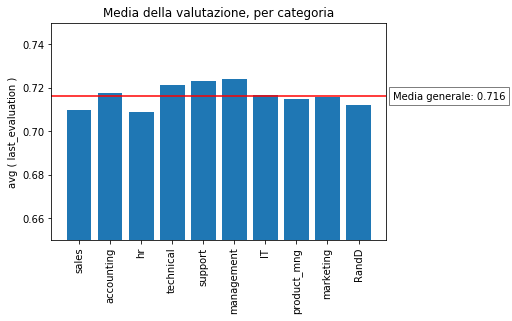

In [9]:
total_mean = df['last_evaluation'].mean()

xlabel = df['sales'].unique()
ylabel = []

for i in df['sales'].unique():
    tmp = df[df['sales'] == i].last_evaluation.mean()
    ylabel.append(tmp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
x = xlabel
y = ylabel
ax.bar(np.arange(len(xlabel)), y)
ax.axhline(total_mean, color="red")
ax.text(1.02, total_mean, "Media generale: %.3f" % total_mean, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())
plt.xticks(np.arange(len(xlabel)), xlabel, rotation=90)
plt.title("Media della valutazione, per categoria")
plt.ylim((0.65,0.75))
plt.ylabel("avg ( last_evaluation )")
plt.show()

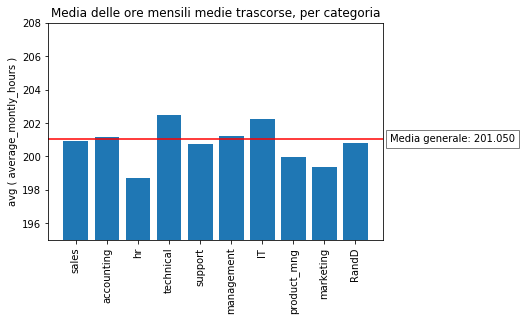

In [10]:
total_mean = df['average_montly_hours'].mean()

xlabel = df['sales'].unique()
ylabel = []

for i in df['sales'].unique():
    tmp = df[df['sales'] == i].average_montly_hours.mean()
    ylabel.append(tmp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
x = xlabel
y = ylabel
ax.bar(np.arange(len(xlabel)), y)
ax.axhline(total_mean, color="red")
ax.text(1.02, total_mean, "Media generale: %.3f" % total_mean, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())
plt.xticks(np.arange(len(xlabel)), xlabel, rotation=90)
plt.title("Media delle ore mensili medie trascorse, per categoria")
plt.ylim((195,208))
plt.ylabel("avg ( average_montly_hours )")
plt.show()

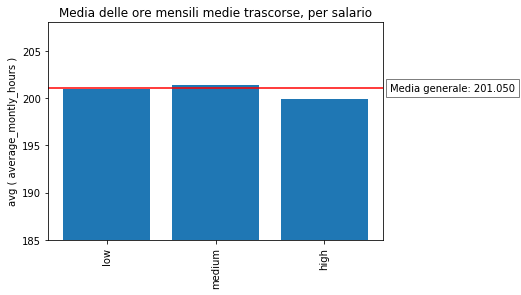

In [162]:
total_mean = df['average_montly_hours'].mean()

xlabel = df['salary'].unique()
ylabel = []

for i in df['salary'].unique():
    tmp = df[df['salary'] == i].average_montly_hours.mean()
    ylabel.append(tmp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
x = xlabel
y = ylabel
ax.bar(np.arange(len(xlabel)), y)
ax.axhline(total_mean, color="red")
ax.text(1.02, total_mean, "Media generale: %.3f" % total_mean, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())
plt.xticks(np.arange(len(xlabel)), xlabel, rotation=90)
plt.title("Media delle ore mensili medie trascorse, per salario")
plt.ylim((185,208))
plt.ylabel("avg ( average_montly_hours )")
plt.show()
#####################################################################
# Questo è un esempio di grafico che non rivela nulla di interessante
#####################################################################

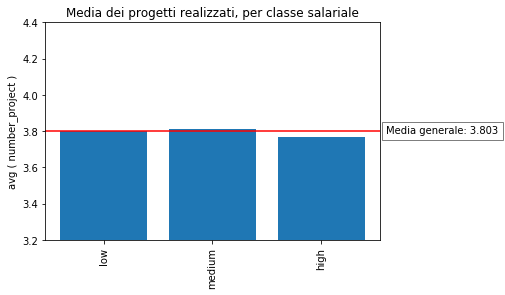

In [20]:
total_mean = df['number_project'].mean()

# df[['last_evaluation', 'sales']].groupby('sales').mean()

xlabel = df['salary'].unique()
ylabel = []

for i in df['salary'].unique():
    tmp = df[df['salary'] == i].number_project.mean()
    ylabel.append(tmp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
x = xlabel
y = ylabel
ax.bar(np.arange(len(xlabel)), y)
ax.axhline(total_mean, color="red")
ax.text(1.02, total_mean, "Media generale: %.3f" % total_mean, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())
plt.xticks(np.arange(len(xlabel)), xlabel, rotation=90)
plt.title("Media dei progetti realizzati, per classe salariale")
plt.ylim((3.2,4.4))
plt.ylabel("avg ( number_project )")
plt.show()
#####################################################################
# Questo è un esempio di grafico che non rivela nulla di interessante
#####################################################################